# Matrix Formalism of the Newton-Euler equations and Equations of Movement

Renato Naville Watanabe

In this notebook will be shown two examples of how to use a matrix formalism to perform forward and inverse dynamics analysis.
 

## Forward Dynamics

For the forward dynamics analysis, we will consider that we know the torques and find the angular accelerations. Naturally, we could begin our analysis from the muscle forces, from the muscle activations or even from the neural commands from the motor cortex. 

<figure><img src="../images/foward.png" width=600 />
    Adapted from Erdemir et al. (2007)

As an example of application of the matrix formalism used in multibody analysis, we will consider the double-pendulum system. It could be a model, for example, from the arm and forearm of a subject.


In the notebook about [free-body diagram](FreeBodyDiagramForRigidBodies.ipynb#doublependulum), we found the following equations of motion to the double-pendulum with actuators.  

\begin{align}
\begin{split}
     \left(\frac{m_1l_1^2}{3} +m_2l_1^2\right)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_1l_2}{2} \cos{(\theta_1-\theta_2)\frac{d^2\theta_2}{dt^2}}  &=  -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)   - \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)  + M_1 - M_{12} \\
    \frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)\frac{d^2\theta_1}{dt^2} + \frac{m_2l_2^2}{3}\frac{d^2\theta_2}{dt^2} &= -\frac{m_2gl_2}{2}\sin(\theta_2) + \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)+ M_{12} 
    \end{split}
\end{align}

If we wanted to simulate this double pendulum we still need to isolate the angular accelerations of each of the bars. As can be easily noted, this would be too laborious to do by hand. Luckily, numerical integration is performed by computers. The easiest way to isolate these angular accelerations is to note that we can write the angular accelerations and the numbers multiplying them as a matrix and a vector. 

\begin{equation}
     \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]\cdot\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) + M_1 - M_{12}\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)-\frac{m_2gl_2}{2}\sin(\theta_2) + M_{12} \end{array}\right] 
\end{equation}

Typically the equations of motion are divided into a matrix corresponding to the terms involving the angular velocities (centrifugal and Coriolis forces), a  matrix corresponding to gravitational force and another matrix corresponding to the forces and torques being applied to the system.

\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}

where 

- $q$ is the vector of the generalized coordinates, like angles and positions;
- $M(q)$ is the matrix containing the inertia elements like mass and moments of inertia;
- $C(q,\dot{q})$  is the vector with the forces and moments dependent from the velocities and angular velocities, like centrifugal and Coriolis forces;
- $G(q)$ is the vector with the forces and torques caused by the gravitational force;
- $Q$ is the vector with forces and torques being applied to the body, like muscular torques and forces due to the constraints.
- $E$ is the vector with the forces and torques due to some external element, like springs or the Ground reaction Force.

We can divide the equation describing the behavior of the double-pendulum in the matrices above:

\begin{equation}
     \underbrace{\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]}_{M}\cdot\underbrace{\left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right]}_{\ddot{q}} = \underbrace{\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right]}_{C} + \underbrace{\left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right]}_{G} + \underbrace{\left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]}_{Q} 
\end{equation}

To solve this differential equation numerically, we must obtain the expression of the angular accelerations. We can perform this by multiplying both sides by the inverse of the matrix $M$.

\begin{equation}
    \left[\begin{array}{c}\frac{d^2\theta_1}{dt^2}\\\frac{d^2\theta_2}{dt^2} \end{array}\right] = \left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\cdot\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\left(\frac{d\theta_2}{dt}\right)^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\left(\frac{d\theta_1}{dt}\right)^2 \sin(\theta_1-\theta_2)\end{array}\right] + \left[\begin{array}{c}-\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1)\\ -\frac{m_2gl_2}{2}\sin(\theta_2) \end{array}\right] + \left[\begin{array}{c} M_1 - M_{12}\\M_{12} \end{array}\right]\right)
\end{equation}

Generically, having the differential equations in the format:

\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}

we can obtain the equation to perform the forward dynamics by:


\begin{equation}
    \ddot{q} = M(q)^{-1}\left(C(q,\dot{q}) + G(q) + Q +  E\right)
\end{equation}



Now that we have the angular accelerations, to solve the equation numerically we must transform the second-order differential equations in first-order differential equations:

\begin{equation}
    \left[\begin{array}{c}\frac{d\omega_1}{dt}\\\frac{d\omega_2}{dt}\\\frac{d\theta_1}{dt}\\\frac{d\theta_2}{dt} \end{array}\right] =  \left[\begin{array}{c}\left[\begin{array}{cc}\frac{m_1l_1^2}{3} +m_2l_1^2&\frac{m_2l_1l_2}{2} \cos(\theta_1-\theta_2)\\\frac{m_2l_1l_2}{2}\cos(\theta_1-\theta_2)&\frac{m_2l_2^2}{3}\end{array}\right]^{-1}\left(\left[\begin{array}{c}- \frac{m_2l_1l_2}{2}\omega_2^2 \sin(\theta_1-\theta_2)\\ \frac{m_2l_1l_2}{2}\omega_1^2 \sin(\theta_1-\theta_2)\end{array}\right]+\left[\begin{array}{c} -\frac{m_1gl_1}{2}\sin(\theta_1)- m_2l_1g \sin(\theta_1) \\-\frac{m_2gl_2}{2}\sin(\theta_2)  \end{array}\right] + \left[ \begin{array}{c}M_1 - M_{12}\\M_{12}\end{array}\right]\right)\\ \omega_1\\ \omega_2\end{array}\right]
\end{equation}

Below is the numerical solution of a double-pendulum with each bar having length equal to 1 m and mass equal to 1 kg.

In [4]:
import numpy as np

g = 9.81
    
m1 = 1
m2 = 1
l1 = 1
l2 = 1

theta10 = np.pi/6
theta20 = np.pi/3
omega10 = +np.pi
omega20 = -2*np.pi

dt = 0.0001
t = np.arange(0, 5, dt)
state = np.zeros((4, len(t)))

state[:,0] = np.array([omega10, omega20, theta10, theta20])
#print(state[0,0])
M1 = 0
M12 = 0

for i in range(1,len(t)):
   
    thetaDiff = state[2,i-1] - state[3,i-1]
      
    M = np.array([[m1*l1**2/3 + m2*l1**2, m2*l1*l2*np.cos(thetaDiff)/2],
                  [m2*l1*l2*np.cos(thetaDiff)/2, m2*l2**2/3]])

    C = np.array([[-m2*l1*l2*np.sin(thetaDiff)*state[1,i-1]**2/2],
                  [m2*l1*l2*np.sin(thetaDiff)*state[0,i-1]**2/2]])

    G = np.array([[-m1*g*l1/2*np.sin(state[2,i-1]) - m2*g*l2*np.sin(state[2,i-1])],
                  [-m2*g*l2/2*np.sin(state[3,i-1])]])

    Q = np.array([[M1 - M12],[M12]])
    
    
    
    dstatedt = np.vstack((np.linalg.inv(M)@(C+G+Q),state[0,[i-1]],state[1,[i-1]]))
    
    state[:,[i]] =  state[:,[i-1]] + dt*dstatedt
    

<IPython.core.display.Javascript object>


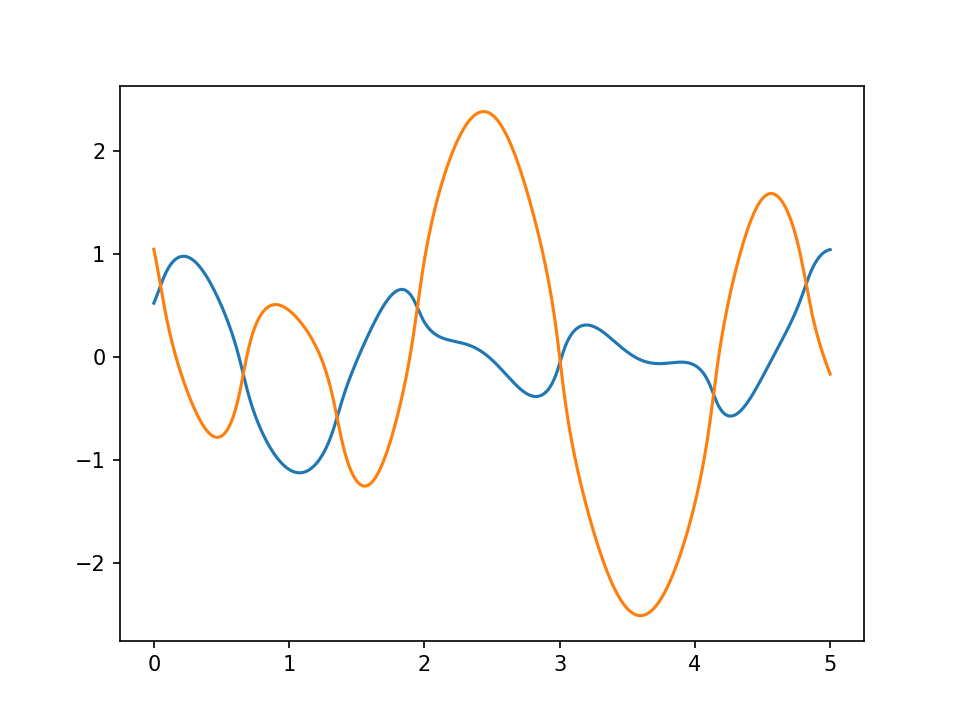

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(t[0::10], state[2:,0::10].T)
plt.show()

<IPython.core.display.Javascript object>


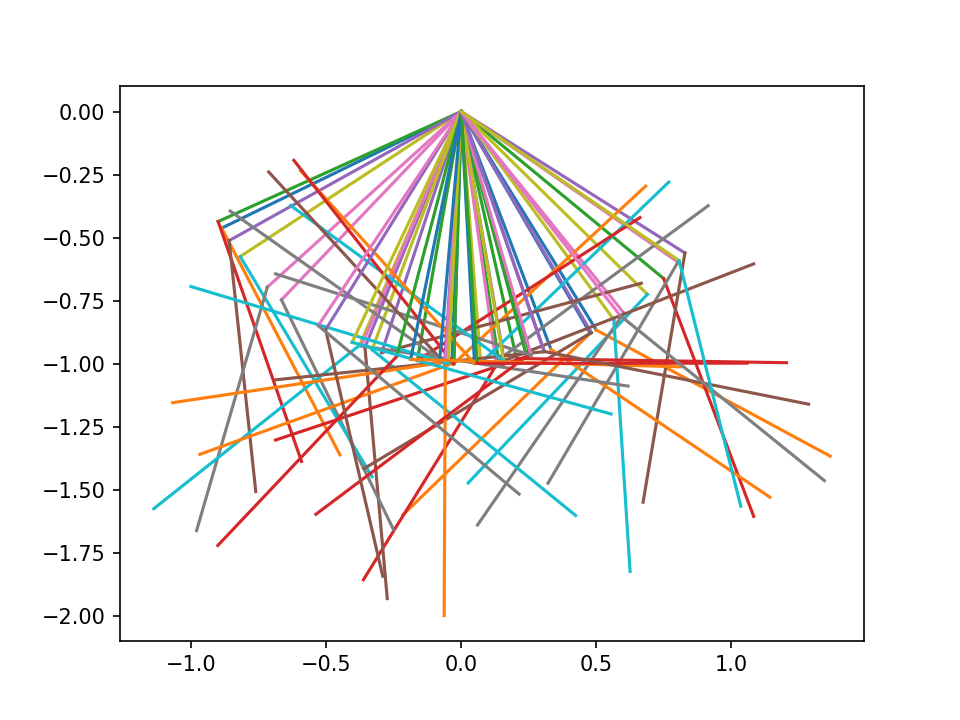

In [6]:
plt.figure()

step = 1000

for i in range(len(state[2,0::step])):
    
    plt.plot([0, l1*np.sin(state[2,i*step])], 
             [0, -l1*np.cos(state[2,i*step])])
    plt.plot([l1*np.sin(state[2,i*step]), l1*np.sin(state[2,i*step])+l2*np.sin(state[3,i*step])], 
             [-l1*np.cos(state[2,i*step]), -l1*np.cos(state[2,i*step])-l2*np.cos(state[3,i*step])])
plt.show()

## Inverse dynamics

For the inverse dynamics analysis, we will obtain the joint torques and forces, from the joint kinematics and external forces.

<figure><img src="../images/inv.png" width=600 />
    Adapted from Erdemir et al. (2007)
    
    
  As an example, we will consider the problem of estimating the forces and torques in the ankle and knee joints during the gait, considering a 3D movement. At this point, we consider that the  accelerations, angular velocities, angular accelerations, masses and moments of inertia necessary  to compute the forces and moments are known. 




 The free-body diagram of the gait, considering a 3D movement is very similar [to the 2D case](GaitAnalysis2D.ipynb). The equations of forces and moments are described by the Newton-Euler equations (for a revision on Tridimensional Newton-Euler equations click [here](Tridimensional%20rigid%20body%20Kinetics.ipynb)):
\begin{align}
\overrightarrow{F_A} + \overrightarrow{GRF} + m_F\overrightarrow{g} &= m_F\overrightarrow{a_{cm_F}}\\
\overrightarrow{M_A} + \overrightarrow{M_{GRF}}+ \overrightarrow{M_{FA}}&=I_F\overrightarrow{\dot{\omega_F}} + \overrightarrow{\omega_F} \times (I_F\overrightarrow{\omega_F})\\ 
\overrightarrow{F_K} -\overrightarrow{F_A} + m_S\overrightarrow{g} &= m_S\overrightarrow{a_{cm_S}}\\
    \overrightarrow{M_K} - \overrightarrow{M_A} + \overrightarrow{M_{FA}} + \overrightarrow{M_{FK}} &= I_F\overrightarrow{\dot{\omega_S}} + \overrightarrow{\omega_S} \times (I_F\overrightarrow{\omega_S}) 
\end{align}
where 

- $\overrightarrow{g} = -9.81\hat{j}$;
- $m_F$ and $m_S$ are the masses of the foot and the shank, respectively;
- $\overrightarrow{GRF}$ is the ground reaction force being applied to the foot;
- $\overrightarrow{a_{cm_F}}$ and $\overrightarrow{a_{cm_S}}$ are the accelerations of the center of mass of the foot and the shank, respectively;
- $\overrightarrow{\omega_F}$ and $\overrightarrow{\omega_S}$  are the angular accelerations of the foot and shank, respectively, described at a basis attached to the segment, and $\overrightarrow{\dot{\omega_F}}$ and $\overrightarrow{\dot{\omega_S}}$ are their time-derivatives;
- $\overrightarrow{F_K}$, $\overrightarrow{F_A}$, $\overrightarrow{M_A}$ and $\overrightarrow{M_A}$ are the forces and moments at the ankle and knee joints, respectively

Note that each of these equations have components at each of the three directions. Additionally, note that the equations of the forces are described in the global basis, and the equations of the moments must be described in the basis attached to the segment relative to that equation. So, it is a good idea to make this clear with a more precise notation. We will denote as a superscript in the vectors the segment where the basis that we are describing the vector is fixed. So for example, $\overrightarrow{M_A^F}$ is the vector of the moment due to the muscle forces of the ankle, described in the basis fixed at the foot. So, the equations can be rewritten as:

\begin{align}
\overrightarrow{F_A^G} + \overrightarrow{GRF^G} + m_F\overrightarrow{g^G} &= m_F\overrightarrow{a_{cm_F}^G}\\
\overrightarrow{M_A^F} + \overrightarrow{M_{GRF}^F}+ \overrightarrow{M_{FA}^F}&=I_F\overrightarrow{\dot{\omega_F^F}} + \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})\\ 
\overrightarrow{F_K^G} -\overrightarrow{F_A^G} + m_S\overrightarrow{g^G} &= m_S\overrightarrow{a_{cm_S}^G}\\
    \overrightarrow{M_K^S} - \overrightarrow{M_A^S} + \overrightarrow{M_{FA}^S} + \overrightarrow{M_{FK}^S} &= I_F\overrightarrow{\dot{\omega_S^S}} + \overrightarrow{\omega_S^S} \times (I_F\overrightarrow{\omega_S^S}) 
\end{align}
where the superscript $G$ denotes the global frame of reference, the superscript $S$ denotes the frame of reference in the shank and the superscript $F$ denotes the frame of reference at the foot.

The moments due to the ground reaction force, the force at the ankle and the force at the knee are computed by cross-multiplying them by their moment-arms. As the forces and the moment-arms are described in the global basis, we must multiply them by the rotation matrix of the basis corresponding to the segment. So, the equations can be rewritten as:

\begin{align}
\overrightarrow{F_A^G} + \overrightarrow{GRF^G} + m_F\overrightarrow{g^G} &= m_F\overrightarrow{a_{cm_F}^G}\\
\overrightarrow{M_A^F} + R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})+ R_F(\overrightarrow{r_{A/cm_F}^G}\times \overrightarrow{F_A}^G)&=I_F\overrightarrow{\dot{\omega_F^F}} + \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})\\ 
\overrightarrow{F_K^G} -\overrightarrow{F_A^G} + m_S\overrightarrow{g^G} &= m_S\overrightarrow{a_{cm_S}^G}\\
\overrightarrow{M_K^S} - \overrightarrow{M_A^S} - R_S(\overrightarrow{r_{A/cm_S}^G}\times \overrightarrow{F_A^G}) + R_S(\overrightarrow{r_{K/cm_S}^G}\times \overrightarrow{F_K^G}) &= I_F\overrightarrow{\dot{\omega_S^S}} + \overrightarrow{\omega_S^S} \times (I_F\overrightarrow{\omega_S^S}) 
\end{align}
where $R_S$ is the rotation matrix of the basis attached to the shank and $R_F$ is the rotation matrix of the basis attached to the foot.

Now, we can note that the vectors $\overrightarrow{M_K^S}$ and $\overrightarrow{M_K^F}$ are the same vectors described in different basis. So we could use only one of the descriptions and use rotation matrices to convert from one to another. To pass the vector from the foot coordinates to the shank coordinate, we must first multiply it by the inverted rotation matrix of the foot and then multiply it by the rotation matrix of the shank. So, $\overrightarrow{M_A^S} = R_SR_F^{-1}\overrightarrow{M_A^F}$ and the equations above can be rewritten as:

\begin{align}
\overrightarrow{F_A^G} + \overrightarrow{GRF^G} + m_F\overrightarrow{g^G} &= m_F\overrightarrow{a_{cm_F}^G}\\
\overrightarrow{M_A^F} + R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})+ R_F(\overrightarrow{r_{A/cm_F}^G}\times \overrightarrow{F_A}^G)&=I_F\overrightarrow{\dot{\omega_F^F}} + \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})\\ 
\overrightarrow{F_K^G} -\overrightarrow{F_A^G} + m_S\overrightarrow{g^G} &= m_S\overrightarrow{a_{cm_S}^G}\\
\overrightarrow{M_K^S} - R_SR_F^{-1}\overrightarrow{M_A^F} - R_S(\overrightarrow{r_{A/cm_S}^G}\times \overrightarrow{F_A^G}) + R_S(\overrightarrow{r_{K/cm_S}^G}\times \overrightarrow{F_K^G}) &= I_F\overrightarrow{\dot{\omega_S^S}} + \overrightarrow{\omega_S^S} \times (I_F\overrightarrow{\omega_S^S}) 
\end{align}

Now, we divide the equations above in the matrices defined previously:
\begin{equation}
\underbrace{\left[\begin{array}{cccc} m_FI_3& [0]& [0]& [0]\\ [0]& I_F  & [0] & [0] \\ [0] &[0] &  m_SI_3& [0] \\ [0] & [0] & [0] & I_S\end{array}\right]}_{M}\cdot\left[\begin{array}{c}\overrightarrow{a_{cm_F}^G}\\\overrightarrow{\dot{\omega_F^F}}\\\overrightarrow{a_{cm_S}^G}\\\overrightarrow{\dot{\omega_S^S}} \\ \end{array}\right] = \underbrace{\left[\begin{array}{c}[0]\\ - \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})  \\ [0] \\ - \overrightarrow{\omega_S^S} \times (I_S\overrightarrow{\omega_S^S}) \end{array}\right]}_{C} + \underbrace{\left[\begin{array}{c}  m_F\overrightarrow{g^G}\\ [0]\\  m_S\overrightarrow{g^G} \\  [0] \end{array}\right]}_{G} + \underbrace{\left[\begin{array}{c}  \overrightarrow{F_A^G}\\ \overrightarrow{M_A^F}+R_F(\overrightarrow{r_{A/cm_F}^G}\times \overrightarrow{F_A}^G)\\  \overrightarrow{F_K^G} - \overrightarrow{F_A^G} \\ \overrightarrow{M_K^S} - R_SR_F^{-1}\overrightarrow{M_A^F} - R_S(\overrightarrow{r_{A/cm_S}^G}\times \overrightarrow{F_A^G}) + R_S(\overrightarrow{r_{K/cm_S}^G}\times \overrightarrow{F_K^G})  \end{array}\right]}_{Q} + \underbrace{\left[\begin{array}{c} \overrightarrow{GRF^G}\\  R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})\\  [0] \\  [0] \end{array}\right]}_{E}
\end{equation}

To perform the inverse dynamics, we still cannot isolate the vector of forces and moments. As the vector $F$ has cross-products we must define the a new operator that performs the cross-product through a matrix multiplication.

We can note that the cross-product between the vectors $\vec{v}$ and $\vec{w}$ has the following result:

\begin{equation}
    \vec{v} \times \vec{w} = \left[\begin{array}{c}v_x\\v_y\\v_z \end{array}\right] \times \left[\begin{array}{c}w_x\\w_y\\w_z \end{array}\right] = \left[\begin{array}{c}v_yw_z - v_zw_y\\v_zw_x - v_xw_z\\v_xw_y - v_yw_x \end{array}\right] = \left[\begin{array}{ccc}0&-v_z&v_y\\v_z&0&-v_x\\-v_y&v_x&0 \end{array}\right]\cdot\left[\begin{array}{c}w_x\\w_y\\w_z \end{array}\right]
\end{equation}

So we can define a new operator known as skew-symmetric matrix:

\begin{equation}
    S(\vec{v}) \triangleq \left[\begin{array}{ccc}0&-v_z&v_y\\v_z&0&-v_x\\-v_y&v_x&0 \end{array}\right]
\end{equation}

Therefore:

\begin{equation}
    \vec{v} \times \vec{w} = S(\vec{v})\cdot\vec{w}
\end{equation}

Now, we will use this operator in  the equation we found previously:

\begin{equation}
\left[\begin{array}{cccc} m_FI_3& [0]& [0]& [0]\\ [0]& I_F  & [0] & [0] \\ [0] &[0] &  m_SI_3& [0] \\ [0] & [0] & [0] & I_S\end{array}\right]\cdot\left[\begin{array}{c}\overrightarrow{a_{cm_F}^G}\\\overrightarrow{\dot{\omega_F^F}}\\\overrightarrow{a_{cm_S}^G}\\\overrightarrow{\dot{\omega_S^S}} \\ \end{array}\right] = \left[\begin{array}{c}[0]\\ - \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})  \\ [0] \\ - \overrightarrow{\omega_S^S} \times (I_S\overrightarrow{\omega_S^S}) \end{array}\right] + \left[\begin{array}{c}  m_F\overrightarrow{g^G}\\ [0]\\  m_S\overrightarrow{g^G} \\  [0] \end{array}\right] + \left[\begin{array}{c}  \overrightarrow{F_A^G}\\ \overrightarrow{M_A^F}+R_F(S(\overrightarrow{r_{A/cm_F}^G})\cdot\overrightarrow{F_A}^G)\\  \overrightarrow{F_K^G} - \overrightarrow{F_A^G} \\ \overrightarrow{M_K^S} - R_SR_F^{-1}\overrightarrow{M_A^F} - R_S(S(\overrightarrow{r_{A/cm_S}^G})\cdot\overrightarrow{F_A^G}) + R_S(S(\overrightarrow{r_{K/cm_S}^G})\cdot\overrightarrow{F_K^G})  \end{array}\right] + \left[\begin{array}{c} \overrightarrow{GRF^G}\\  R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})\\  [0] \\  [0] \end{array}\right]
\end{equation}

Now it is possible to write the vector $F$ as multiplication of a matrix by a vector:

\begin{equation}
\left[\begin{array}{cccc} m_FI_3& [0]& [0]& [0]\\ [0]& I_F  & [0] & [0] \\ [0] &[0] &  m_SI_3& [0] \\ [0] & [0] & [0] & I_S\end{array}\right]\cdot\left[\begin{array}{c}\overrightarrow{a_{cm_F}^G}\\\overrightarrow{\dot{\omega_F^F}}\\\overrightarrow{a_{cm_S}^G}\\\overrightarrow{\dot{\omega_S^S}} \\ \end{array}\right] = \left[\begin{array}{c}[0]\\ - \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})  \\ [0] \\ - \overrightarrow{\omega_S^S} \times (I_S\overrightarrow{\omega_S^S}) \end{array}\right] + \left[\begin{array}{c}  m_F\overrightarrow{g^G}\\ [0]\\  m_S\overrightarrow{g^G} \\  [0] \end{array}\right] + \left[\begin{array}{ccc}  I_3& [0]& [0]& [0]\\ R_FS\left(\overrightarrow{r_{A/cm_F}^G}\right)&I_3& [0]& [0]\\  -I_3& [0]& I_3 & [0] \\ -R_SS\left(\overrightarrow{r_{A/cm_S}^G}\right)& - R_SR_F^{-1} & R_SS\left(\overrightarrow{r_{K/cm_S}^G}\right) & I_3      \end{array}\right]\cdot\left[\begin{array}{c}  \overrightarrow{F_A^G}\\ \overrightarrow{M_A^F}\\  \overrightarrow{F_K^G}\\ \overrightarrow{M_K^S}\end{array}\right] + \left[\begin{array}{c} \overrightarrow{GRF^G}\\  R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})\\  [0] \\  [0] \end{array}\right]
\end{equation}

So, the final equation to compute the forces and torques is obtained by multiplying everything by the inverse of the matrix multipliying the vector of forces:

\begin{equation}
\left[\begin{array}{c}  \overrightarrow{F_A^G}\\ \overrightarrow{M_A^F}\\  \overrightarrow{F_K^G}\\ \overrightarrow{M_K^S}\end{array}\right]  = \left[\begin{array}{ccc}  I_3& [0]& [0]& [0]\\ R_FS\left(\overrightarrow{r_{A/cm_F}^G}\right)&I_3& [0]& [0]\\  -I_3& [0]& I_3 & [0] \\ -R_SS\left(\overrightarrow{r_{A/cm_S}^G}\right)& - R_SR_F^{-1} & R_SS\left(\overrightarrow{r_{K/cm_S}^G}\right) & I_3      \end{array}\right]^{-1}\cdot\left(\left[\begin{array}{cccc} m_FI_3& [0]& [0]& [0]\\ [0]& I_F  & [0] & [0] \\ [0] &[0] &  m_SI_3& [0] \\ [0] & [0] & [0] & I_S\end{array}\right]\cdot\left[\begin{array}{c}\overrightarrow{a_{cm_F}^G}\\\overrightarrow{\dot{\omega_F^F}}\\\overrightarrow{a_{cm_S}^G}\\\overrightarrow{\dot{\omega_S^S}} \\ \end{array}\right] - \left[\begin{array}{c}[0]\\ - \overrightarrow{\omega_F^F} \times (I_F\overrightarrow{\omega_F^F})  \\ [0] \\ - \overrightarrow{\omega_S^S} \times (I_S\overrightarrow{\omega_S^S}) \end{array}\right] -\left[\begin{array}{c} \overrightarrow{GRF^G}\\  R_F(\overrightarrow{r_{cop/cm_F}^G}\times \overrightarrow{GRF^G})\\  [0] \\  [0] \end{array}\right] - \left[\begin{array}{c}  m_F\overrightarrow{g^G}\\ [0]\\  m_S\overrightarrow{g^G} \\  [0] \end{array}\right]\right)
\end{equation}


With the last equation, we can obtain all the forces and moments using only one line of code. Computationally, it is less prone to errors and more efficient.

So, generically, the steps to perform the analysis of inverse dynamics is:

- write the equations of Newton-Euler for each segment. Write explicitly the basis at which  each vector is described.

- use the rotation matrices of the basis to pass the description of a vector to another basis. Use it in a way that the same vector is described at just a single frame of reference.

- write the cross-products as a product between the skew-symmetric matrix $S$ of the first vector and the second vector.

- write the equations in the matrix format, repeated here:

\begin{equation}
    M(q)\ddot{q} = C(q,\dot{q}) + G(q) + Q +  E
\end{equation}

- write explicitly the vector containing the unknown forces and moments $Q$, as a multiplication of a matrix and vector containing only the unknown forces.

- isolate the vector containing only the unknown forces by multiplying the whole equation by the inverse of the matrix multiplying the vector with the forces.

## Problems

1) Solve the problems 18.3.20 and 18.3.24 of the Ruina and Rudra's book by using the Lagrangian formalism (it is much easier than use the Newton-Euler formalism) and then use the matrix formalism to obtain the expressions of the angular accelerations. 

2) Write the matrices to find the forces and torques in a tridimensional double pendulum, consisted of two cylindrical bars. Consider that you know all the masses, moments of inertia, accelerations, angular velocities and angular accelerations necessary to solve the problem.

## References 


- YAMAGUCHI, G. T. Dynamic modeling of musculoskeletal motion: a vectorized approach for biomechanical analysis in three dimensions., 2001

- CRAIG, J. Introduction to robotics. , 1989

- JAIN, A. Robot and multibody dynamics. , 2011

- SPONG, M. W.; HUTCHINSON, S.; VIDYASAGAR, M. Robot modeling and control., 2006

- ERDEMIR, A. et al. Model-based estimation of muscle forces exerted during movements. Clinical Biomechanics, v. 22, n. 2, p. 131–154, 2007. 

- STANEV, D.; MOUSTAKAS, K. Simulation of constrained musculoskeletal systems in task space. IEEE Transactions on Biomedical Engineering, v. 65, n. 2, p. 307–318, 2018.

- ZAJAC FE, GORDON ME , [Determining muscle's force and action in multi-articular movement](https://drive.google.com/open?id=0BxbW72zV7WmUcC1zSGpEOUxhWXM&authuser=0). Exercise and Sport Sciences Reviews, 17, 187-230. , 1989

- RUINA A, RUDRA P. [Introduction to Statics and Dynamics](http://ruina.tam.cornell.edu/Book/index.html). Oxford University Press. , 2015